#### 반복문과 조건문

In [1]:
for each in [0, 1, 2, 3, 4, 5]:
    print(each)

0
1
2
3
4
5


In [2]:
for each in range(6):
    print(each)

0
1
2
3
4
5


In [3]:
x = [1, 2, 3, 4, 5]
y = []

for n in x:
    y.append(n**2)
y

[1, 4, 9, 16, 25]

In [4]:
x = [1, 2, 3, 4, 5]
y = [n**2 for n in x]

y

[1, 4, 9, 16, 25]

In [5]:
import numpy as np

In [6]:
x = np.array(x)
y = x**2

y

array([ 1,  4,  9, 16, 25], dtype=int32)

In [7]:
a = [3, 4, 5]
for i in range(len(a)):
    a[i] += 3 # i == len(a) : 3 -> range(3) : 0, 1, 2

a

[6, 7, 8]

In [8]:
a = [3, 4, 5]
a = [i + 3 for i in a]
a

[6, 7, 8]

In [1]:
crime_raw_data = pd.read_csv('./datas/2017_crime.csv', encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,0
1,중부,살인,검거,0
2,중부,강도,발생,6
3,중부,강도,검거,6
4,중부,강간,발생,173


In [2]:
crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 12.1+ KB


In [3]:
crime_station = crime_raw_data.pivot_table(crime_raw_data, index=['구분'], columns=['죄종', '발생검거'],
                                          aggfunc=[np.sum])
crime_station.head()

sum                                             
       건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    366  456  16  13   6   6   787  2069  1942  2229
강동    169  172  12  10   6   5   949  1645  2109  2429
강북    153  208   5   7   8   8   635  1014  2023  2156
강서    253  316   6   4  11  11  1113  1888  2544  2916
관악    323  379   6   7   7   8  1152  1979  2666  3152

In [4]:
crime_station.columns

MultiIndex([('sum', '건수', '강간', '검거'),
            ('sum', '건수', '강간', '발생'),
            ('sum', '건수', '강도', '검거'),
            ('sum', '건수', '강도', '발생'),
            ('sum', '건수', '살인', '검거'),
            ('sum', '건수', '살인', '발생'),
            ('sum', '건수', '절도', '검거'),
            ('sum', '건수', '절도', '발생'),
            ('sum', '건수', '폭력', '검거'),
            ('sum', '건수', '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

In [5]:
crime_station.columns = crime_station.columns.droplevel([0,1]) # droplevel([0,1]) : 'sum', '건수' 컬럼 없애기
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [6]:
crime_station['강도', '검거']

구분
강남     16
강동     12
강북      5
강서      6
관악      6
광진      8
구로      6
금천      5
남대문     3
노원      7
도봉      3
동대문     5
동작      9
마포      8
방배      5
서대문     2
서부      2
서초      2
성동      3
성북      5
송파      3
수서      8
양천      2
영등포     5
용산      4
은평      2
종로      4
종암      3
중랑      4
중부      6
혜화      4
Name: (강도, 검거), dtype: int64

In [7]:
crime_station['살인', '발생']

구분
강남      6
강동      5
강북      8
강서     11
관악      8
광진      6
구로      7
금천      5
남대문     1
노원      4
도봉      1
동대문    11
동작      1
마포      3
방배      1
서대문     4
서부      3
서초      8
성동      1
성북      5
송파      6
수서      1
양천      3
영등포    15
용산      1
은평      3
종로      5
종암      2
중랑      5
중부      0
혜화      2
Name: (살인, 발생), dtype: int64

In [8]:
crime_station.head()

죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    366  456  16  13   6   6   787  2069  1942  2229
강동    169  172  12  10   6   5   949  1645  2109  2429
강북    153  208   5   7   8   8   635  1014  2023  2156
강서    253  316   6   4  11  11  1113  1888  2544  2916
관악    323  379   6   7   7   8  1152  1979  2666  3152

In [9]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [10]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229
강동,169,172,12,10,6,5,949,1645,2109,2429
강북,153,208,5,7,8,8,635,1014,2023,2156
강서,253,316,6,4,11,11,1113,1888,2544,2916
관악,323,379,6,7,7,8,1152,1979,2666,3152


In [11]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [12]:
station_names = ['혜화', '남대문', '중부', '종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구', '중구', '성북구', '은평구', '서초구', '강남구']

In [13]:
tmp_gu = []
for idx, _ in crime_station.iterrows():
    if idx in station_names:
        tmp_gu.append(gu_names[station_names.index(idx)])
    else:
        tmp_gu.append(idx + '구')

In [14]:
crime_station['구'] = tmp_gu # '구' 컬럼 만들어서 tmp_gu 데이터 추가
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,강북구
강서,253,316,6,4,11,11,1113,1888,2544,2916,강서구
관악,323,379,6,7,7,8,1152,1979,2666,3152,관악구
광진,208,261,8,13,5,6,1168,2220,1900,2146,광진구
구로,181,328,6,8,8,7,869,1725,2344,2827,구로구
금천,212,240,5,5,5,5,674,1141,1676,1874,금천구
남대문,62,94,3,3,0,1,400,785,780,863,중구


In [15]:
crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429
강북구,153,208,5,7,8,8,635,1014,2023,2156
강서구,253,316,6,4,11,11,1113,1888,2544,2916
관악구,323,379,6,7,7,8,1152,1979,2666,3152


In [16]:
crime_gu['살인발생'].sort_values(ascending=False).head

<bound method NDFrame.head of 구
영등포구    15
강서구     11
동대문구    11
서초구      9
강북구      8
관악구      8
강남구      7
종로구      7
성북구      7
구로구      7
은평구      6
송파구      6
광진구      6
금천구      5
강동구      5
중랑구      5
노원구      4
서대문구     4
양천구      3
마포구      3
도봉구      1
동작구      1
중구       1
성동구      1
용산구      1
Name: 살인발생, dtype: int64>

In [17]:
crime_gu['폭력발생'].sort_values(ascending=False).head

<bound method NDFrame.head of 구
강남구     3956
영등포구    3190
관악구     3152
송파구     3007
강서구     2916
중랑구     2858
구로구     2827
마포구     2673
노원구     2478
강동구     2429
서초구     2404
용산구     2381
은평구     2256
동대문구    2249
강북구     2156
양천구     2148
광진구     2146
종로구     2143
중구      2061
성북구     1902
금천구     1874
동작구     1700
서대문구    1676
성동구     1559
도봉구     1258
Name: 폭력발생, dtype: int64>

In [18]:
crime_gu['강도발생'].sort_values(ascending=False).head

<bound method NDFrame.head of 구
강남구     20
서초구     13
광진구     13
종로구     10
강동구     10
노원구      9
중구       9
구로구      8
마포구      8
성북구      8
동작구      7
관악구      7
강북구      7
금천구      5
영등포구     5
용산구      5
강서구      4
은평구      4
성동구      3
동대문구     3
도봉구      3
양천구      3
중랑구      3
서대문구     1
송파구      1
Name: 강도발생, dtype: int64>

In [19]:
crime_gu['절도발생'].sort_values(ascending=False).head

<bound method NDFrame.head of 구
강남구     3130
영등포구    2304
송파구     2274
광진구     2220
마포구     2094
관악구     1979
강서구     1888
중구      1846
서초구     1812
구로구     1725
강동구     1645
종로구     1644
양천구     1590
동대문구    1547
노원구     1538
중랑구     1533
은평구     1387
용산구     1346
성북구     1344
서대문구    1230
동작구     1226
금천구     1141
성동구     1072
강북구     1014
도봉구      633
Name: 절도발생, dtype: int64>

In [20]:
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429
강북구,153,208,5,7,8,8,635,1014,2023,2156
강서구,253,316,6,4,11,11,1113,1888,2544,2916
관악구,323,379,6,7,7,8,1152,1979,2666,3152


In [21]:
crime_gu[['강도검거', '살인검거']].div(crime_gu['강도발생'], axis=0)
# 여러 컬럼을 한 컬럼으로 나눌 때

,강도검거,살인검거
구,,
강남구,1.200000,0.350000
강동구,1.200000,0.600000
강북구,0.714286,1.142857
강서구,1.500000,2.750000
관악구,0.857143,1.000000
광진구,0.615385,0.384615
구로구,0.750000,1.000000
금천구,1.000000,1.000000
노원구,0.777778,0.444444


In [22]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values) * 100
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956,81.713344,120.000000,100.0,44.185304,86.223458
강동구,169,172,12,10,6,5,949,1645,2109,2429,98.255814,120.000000,120.0,57.689970,86.825854
강북구,153,208,5,7,8,8,635,1014,2023,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,253,316,6,4,11,11,1113,1888,2544,2916,80.063291,150.000000,100.0,58.951271,87.242798
관악구,323,379,6,7,7,8,1152,1979,2666,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [23]:
crim_gu = crime_gu.drop(columns=num) # 위에 각 범죄의 검거 횟수를 num에 저장 했음
crim_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,120.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,120.000000,120.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,150.000000,100.0,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [24]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,169,172,12,10,6,5,949,1645,2109,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,153,208,5,7,8,8,635,1014,2023,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,253,316,6,4,11,11,1113,1888,2544,2916,80.063291,100.000000,100.0,58.951271,87.242798
관악구,323,379,6,7,7,8,1152,1979,2666,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [25]:
crime_gu.rename(columns = {'강간발생' : '강간',
                           '강도발생' : '강도',
                           '살인발생' : '살인',
                           '절도발생' : '절도',
                           '폭력발생' : '폭력'},
               inplace=True)
crime_gu.head()

,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,169,172,12,10,6,5,949,1645,2109,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,153,208,5,7,8,8,635,1014,2023,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,253,316,6,4,11,11,1113,1888,2544,2916,80.063291,100.000000,100.0,58.951271,87.242798
관악구,323,379,6,7,7,8,1152,1979,2666,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [26]:
col = ['살인', '강도', '강간', '절도', '폭력']
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000
강동구,0.333333,0.50,0.283361,0.525559,0.614004
강북구,0.533333,0.35,0.342669,0.323962,0.544995
강서구,0.733333,0.20,0.520593,0.603195,0.737108
관악구,0.533333,0.35,0.624382,0.632268,0.796764


In [27]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458
강동구,0.333333,0.50,0.283361,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854
강북구,0.533333,0.35,0.342669,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169
강서구,0.733333,0.20,0.520593,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798
관악구,0.533333,0.35,0.624382,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218


In [28]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458,0.893333
강동구,0.333333,0.50,0.283361,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854,0.451251
강북구,0.533333,0.35,0.342669,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169,0.418992
강서구,0.733333,0.20,0.520593,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798,0.558846
관악구,0.533333,0.35,0.624382,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218,0.587350


In [29]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm['검거'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,0.466667,1.00,1.000000,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458,0.893333,82.424421
강동구,0.333333,0.50,0.283361,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854,0.451251,88.554328
강북구,0.533333,0.35,0.342669,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169,0.418992,80.288141
강서구,0.733333,0.20,0.520593,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798,0.558846,85.251472
관악구,0.533333,0.35,0.624382,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218,0.587350,80.246199


In [30]:
crime_gu_norm['범죄'].sort_values(ascending=False).head()

구
강남구     0.893333
영등포구    0.708412
서초구     0.642180
관악구     0.587350
강서구     0.558846
Name: 범죄, dtype: float64

In [31]:
crime_gu_norm['검거'].sort_values(ascending=False).head()

구
도봉구     90.917804
은평구     90.163414
강동구     88.554328
동대문구    88.003169
금천구     87.367738
Name: 검거, dtype: float64

In [32]:
crime_gu_norm['검거'].sort_values().head()

구
중구     58.298750
종로구    69.110660
서초구    69.515640
양천구    70.412195
구로구    72.694898
Name: 검거, dtype: float64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from matplotlib import font_manager

f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
rc('font', family='Malgun Gothic')

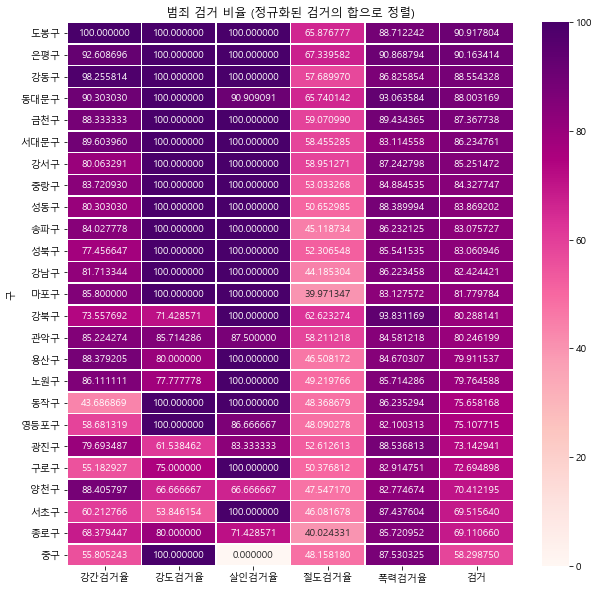

In [40]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col],
           annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

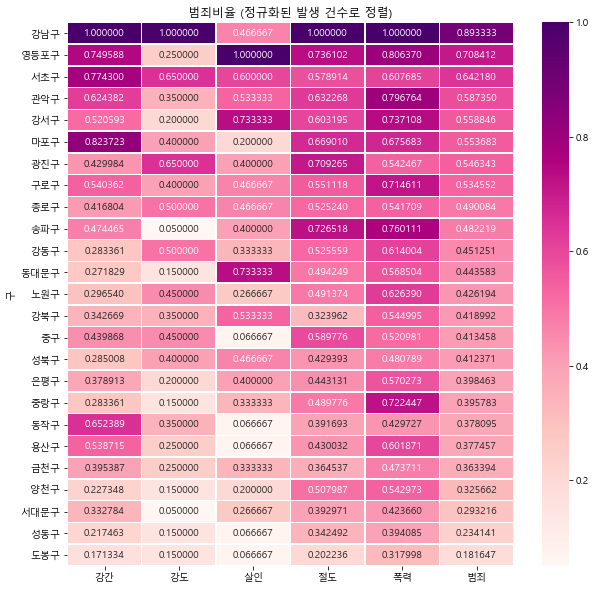

In [45]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col],
           annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show

In [46]:
crime_gu.to_csv('./datas/seoul_crime_result.csv', sep=',', encoding='UTF-8')